In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

path = '../data_raw/'
sales_2023_sexage = pd.read_csv(path + 'card_sales_2023_sexage.csv', encoding='cp949')


In [3]:
print("Shape:", sales_2023_sexage.shape)

Shape: (33544, 8)


In [4]:
print("Columns:", sales_2023_sexage.columns)

Columns: Index(['시군구명', '월', '분류', '성별', '연령대', '매출건수', '매출금액합계', '데이터기준일'], dtype='object')


In [5]:
sales_2023_sexage.dtypes

시군구명      object
월          int64
분류        object
성별        object
연령대       object
매출건수       int64
매출금액합계     int64
데이터기준일     int64
dtype: object

In [6]:
sales_2023_sexage.head()

,시군구명,월,분류,성별,연령대,매출건수,매출금액합계,데이터기준일
0,창원시 의창구,1,교육,남성,20대,21,191400,20240101
1,창원시 의창구,1,교육,남성,30대,147,4508030,20240101
2,창원시 의창구,1,교육,남성,40대,553,57949252,20240101
3,창원시 의창구,1,교육,남성,50대,60,6155280,20240101
4,창원시 의창구,1,교육,남성,60대,10,24800,20240101


In [7]:
sales_2023_sexage.tail()

,시군구명,월,분류,성별,연령대,매출건수,매출금액합계,데이터기준일
33539,합천군,12,자동차,여성,40대,6,374100,20240101
33540,합천군,12,자동차,여성,50대,9,455000,20240101
33541,합천군,12,주거생활,남성,30대,3,64600,20240101
33542,합천군,12,주거생활,남성,50대,3,365800,20240101
33543,합천군,12,주거생활,여성,60대,3,141300,20240101


In [8]:
sales_2023_sexage.isnull().sum()

시군구명      0
월         0
분류        0
성별        0
연령대       0
매출건수      0
매출금액합계    0
데이터기준일    0
dtype: int64

In [9]:
print("총 매출 건수:", sales_2023_sexage['매출건수'].sum())

총 매출 건수: 81734503


In [10]:
print("총 매출 금액:", sales_2023_sexage['매출금액합계'].sum())

총 매출 금액: 2045821184462


In [14]:
print("업종 분포")
print(sales_2023_sexage['분류'].value_counts())

업종 분포
분류
유통           3653
식생활          3585
의료/미용        3362
레포츠/문화/취미    3288
자동차          3092
서비스          2451
기타           2293
교육           2199
여행           2178
의생활          2095
유흥           1858
내구재          1762
주거생활         1728
Name: count, dtype: int64


In [15]:
print("\n성별 분포")
print(sales_2023_sexage['성별'].value_counts())


성별 분포
성별
남성    17684
여성    15860
Name: count, dtype: int64


In [16]:
print("\n연령대 분포")
print(sales_2023_sexage['연령대'].value_counts())


연령대 분포
연령대
40대      5705
50대      5650
30대      5473
60대      5098
20대      5070
70대이상    3732
10이하     2816
Name: count, dtype: int64


# sales_2023_sexage EDA 플랜

| 단계 | 내용 | 상세 작업 |
|:---|:---|:---|
| 1 | 기본 구조 확인 | - 데이터 크기(shape) 확인<br>- 컬럼 목록(columns) 확인<br>- 데이터 타입(dtypes) 확인<br>- 데이터 샘플(head, tail) 확인 |
| 2 | 결측치 확인 | - 컬럼별 결측치 개수 확인(isnull.sum()) |
| 3 | 주요 지표 요약 | - 총 매출건수 합계(매출건수)<br>- 총 매출금액 합계(매출금액합계) |
| 4 | 주요 범주 분석 | - 업종별(분류) 매출 합계<br>- 성별(성별) 매출 합계<br>- 연령대별(연령대) 매출 합계<br>- 지역별(시군구명) 매출 합계 |
| 5 | 시각화 | - 업종별 매출 합계 Top 10 (barplot)<br>- 연령대별 매출 합계 (lineplot)<br>- 성별 매출 합계 (barplot)<br>- 업종별 평균단가 Top 10 (barplot)<br>- 지역별 매출 합계 Top 10 (barplot) |
| 6 | 특이사항 탐색 (선택) | - 업종별 매출 단가 이상 여부<br>- 지역별 특정 연령대 소비 집중 여부 |


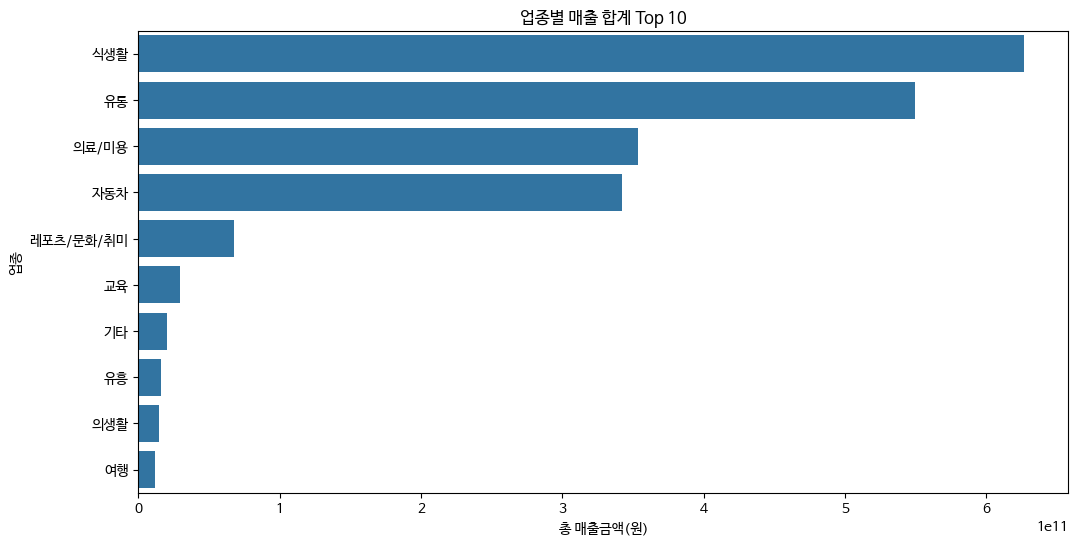

In [22]:
top10_category = (sales_2023_sexage
                  .groupby('분류')['매출금액합계']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=top10_category.values, y=top10_category.index)
plt.title('업종별 매출 합계 Top 10')
plt.xlabel('총 매출금액(원)')
plt.ylabel('업종')
plt.show()

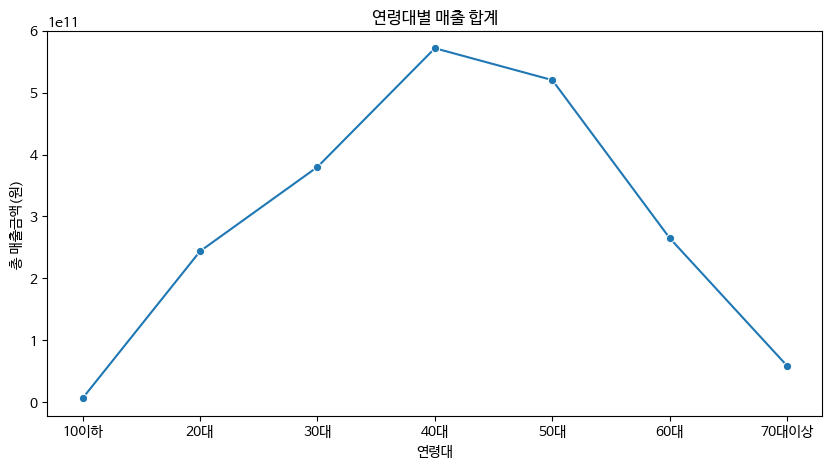

In [13]:
age_sales = (sales_2023_sexage
             .groupby('연령대')['매출금액합계']
             .sum()
             .sort_index())

plt.figure(figsize=(10,5))
sns.lineplot(x=age_sales.index, y=age_sales.values, marker='o')
plt.title('연령대별 매출 합계')
plt.xlabel('연령대')
plt.ylabel('총 매출금액(원)')
plt.show()


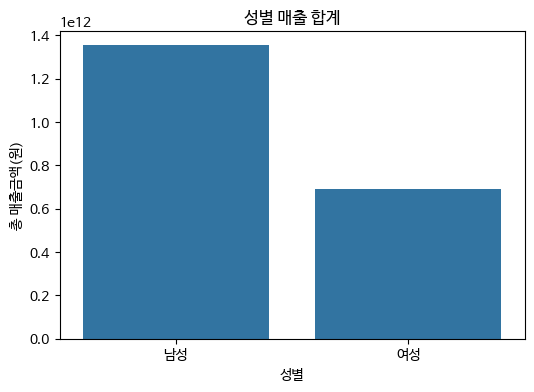

In [17]:
sex_sales = (sales_2023_sexage
             .groupby('성별')['매출금액합계']
             .sum()
             .sort_values(ascending=False))

plt.figure(figsize=(6,4))
sns.barplot(x=sex_sales.index, y=sex_sales.values)
plt.title('성별 매출 합계')
plt.xlabel('성별')
plt.ylabel('총 매출금액(원)')
plt.show()

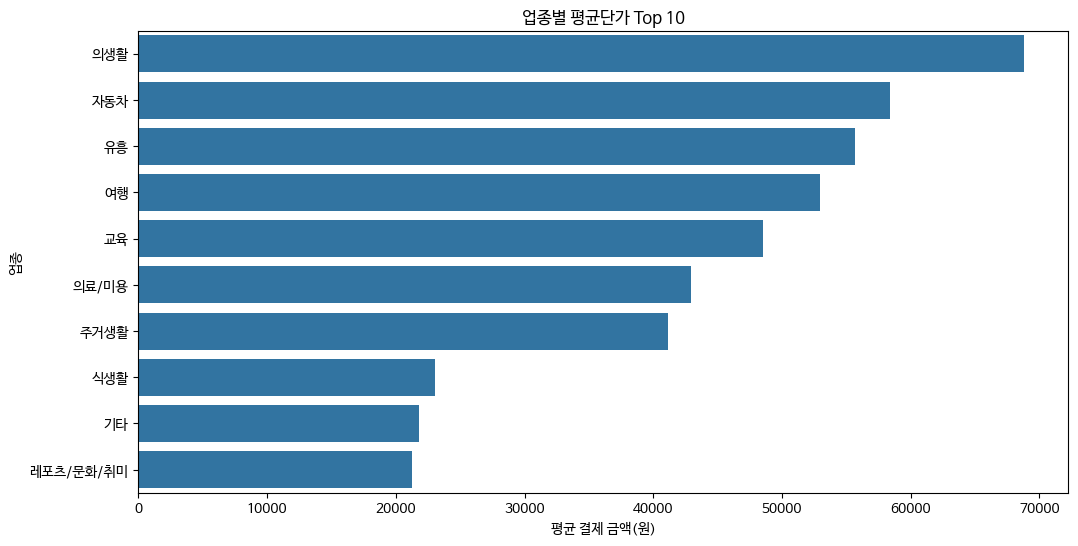

In [19]:
category_avg_price = (sales_2023_sexage
                      .groupby('분류')
                      .agg({'매출금액합계': 'sum', '매출건수': 'sum'}))

category_avg_price['평균단가'] = category_avg_price['매출금액합계'] / category_avg_price['매출건수']

top10_avg_price = category_avg_price['평균단가'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_avg_price.values, y=top10_avg_price.index)
plt.title('업종별 평균단가 Top 10')
plt.xlabel('평균 결제 금액(원)')
plt.ylabel('업종')
plt.show()

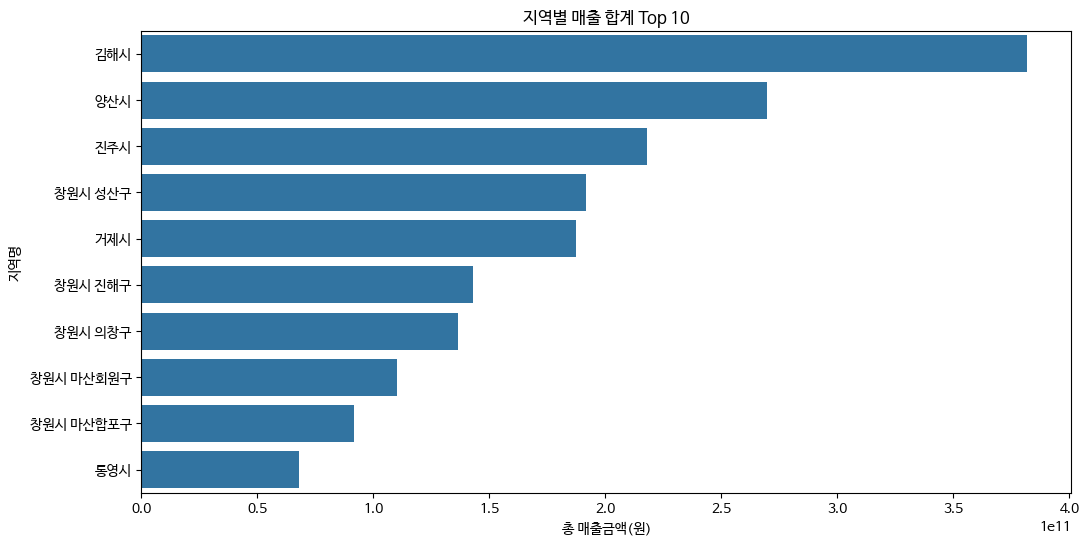

In [23]:
region_sales = (sales_2023_sexage
                .groupby('시군구명')['매출금액합계']
                .sum()
                .sort_values(ascending=False)
                .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title('지역별 매출 합계 Top 10')
plt.xlabel('총 매출금액(원)')
plt.ylabel('지역명')
plt.show()


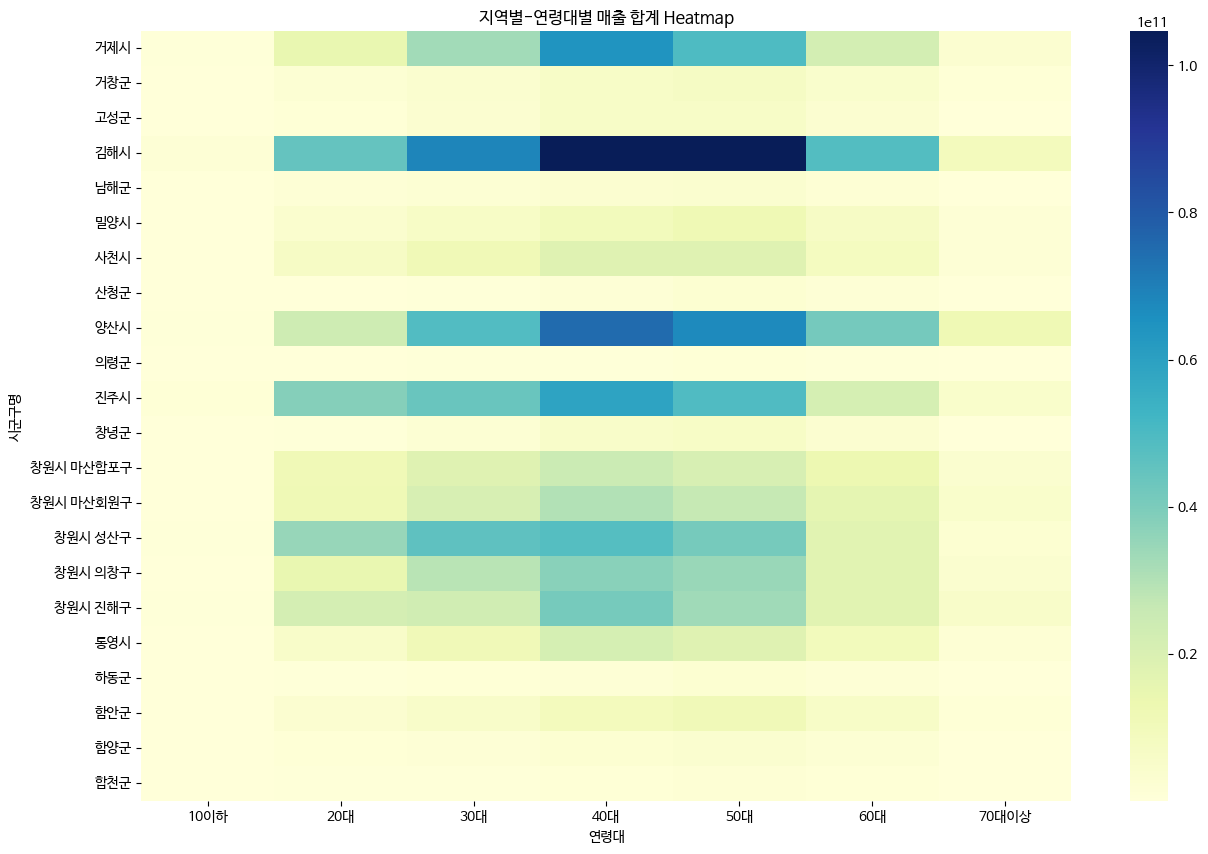

In [27]:
region_age_sales = (sales_2023_sexage
                    .groupby(['시군구명', '연령대'])['매출금액합계']
                    .sum()
                    .reset_index())

pivot_table = region_age_sales.pivot(index='시군구명', columns='연령대', values='매출금액합계')

plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('지역별-연령대별 매출 합계 Heatmap')
plt.show()
